# Import the neccessary Libraries

In [60]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.gridspec as gridspec
from sklearn.metrics import log_loss
from scipy.stats import probplot, shapiro

In [52]:
# Import the dataset
df =  pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head(5)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Descriptive Analysis

In [3]:
df.shape

(103904, 25)

In [54]:
df.describe().transpose().style.background_gradient() 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.000000,51951.500000,29994.645522,0.000000,25975.750000,51951.500000,77927.250000,103903.000000
id,103904.000000,64924.210502,37463.812252,1.000000,32533.750000,64856.500000,97368.250000,129880.000000
Age,103904.000000,39.379706,15.114964,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,103904.000000,1189.448375,997.147281,31.000000,414.000000,843.000000,1743.000000,4983.000000
Inflight wifi service,103904.000000,2.729683,1.327829,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,103904.000000,3.060296,1.525075,0.000000,2.000000,3.000000,4.000000,5.000000
Ease of Online booking,103904.000000,2.756901,1.398929,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,103904.000000,2.976883,1.277621,0.000000,2.000000,3.000000,4.000000,5.000000
Food and drink,103904.000000,3.202129,1.329533,0.000000,2.000000,3.000000,4.000000,5.000000
Online boarding,103904.000000,3.250375,1.349509,0.000000,2.000000,3.000000,4.000000,5.000000


In [5]:
df['Age'].value_counts()[7]

562

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# Data Pre-Processing

In [7]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'id'], axis=1)

df.fillna(df.mean(), inplace=True)

In [56]:

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = df[df["Flight Distance"]<5000]

df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,0,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,1,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mode()[0],inplace=True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
num_col=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
cat_col=[x for x in df.columns if x not in num_col]

# converting all ordinal features to categorical features
df[cat_col]=df[cat_col].astype("category")

#verifying the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

# Explonatory Data Analysis

Text(0.5, 1.0, 'Satisfaction Count')

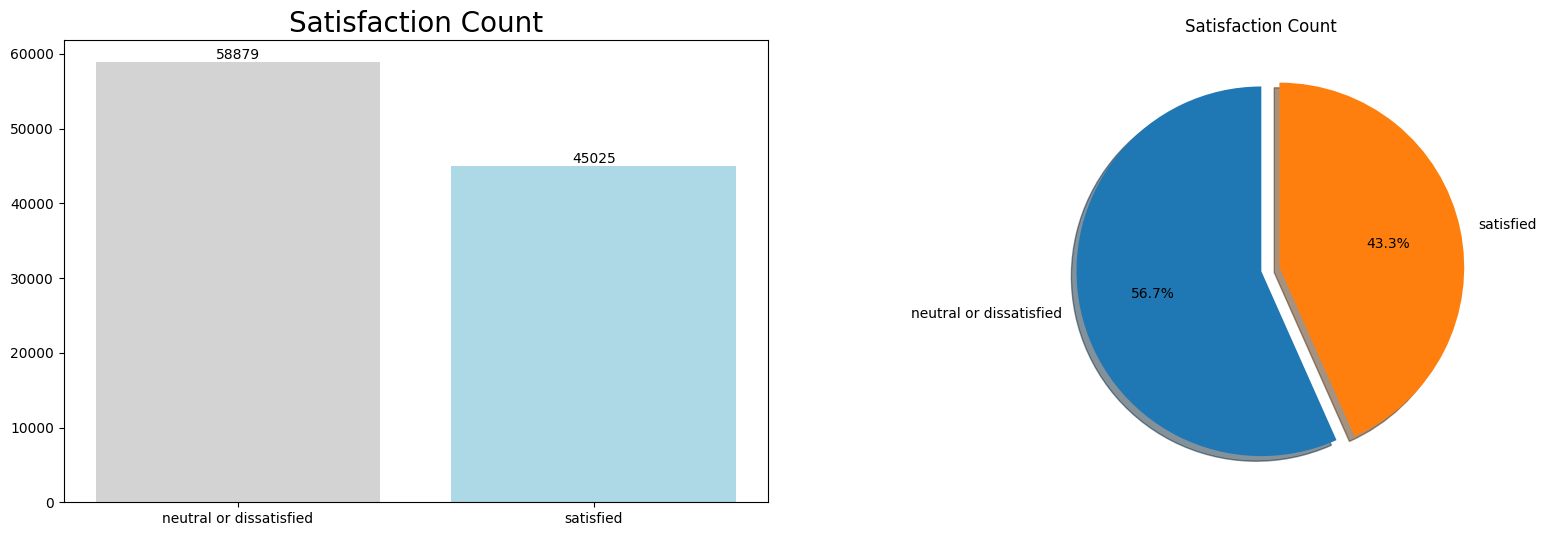

In [58]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,6))

# plot 1

ax1.bar(df["satisfaction"].value_counts().index,df["satisfaction"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("Satisfaction Count",fontsize = 20)
for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

# plot 2

label = list(df['satisfaction'].value_counts().index)
value = list(df["satisfaction"].value_counts().values)
ax2.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90,shadow = True)
ax2.set_title("Satisfaction Count")

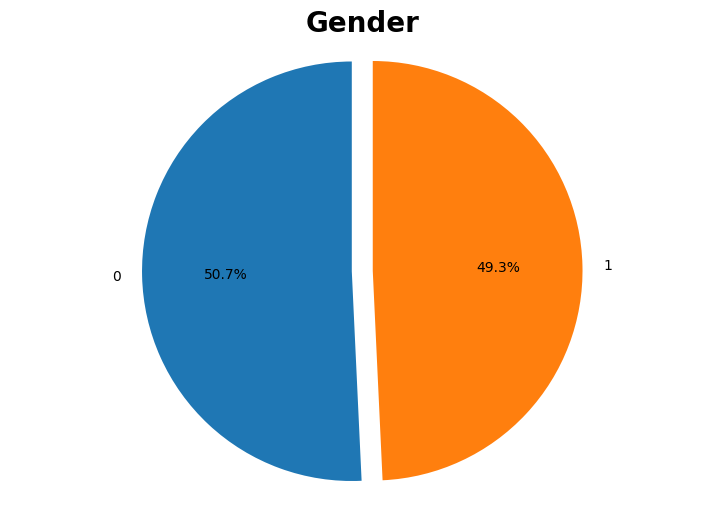

In [61]:
fig = plt.figure(figsize=(20,6))
grid = gridspec.GridSpec(nrows = 1,ncols = 2,figure = fig)

ax3 = fig.add_subplot(grid[0,1:])
ax3.set_title("Gender",weight = "bold",fontsize = 20)
label = list(df['Gender'].value_counts().index)
value = list(df["Gender"].value_counts().values)
ax3.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90)
ax3.axis("equal")
#sns.countplot(x = "satisfaction",data = df,ax = ax1,hue = "satisfaction")
plt.show()

High number of passengers are females.

Text(0.5, 1.0, 'Customer Type')

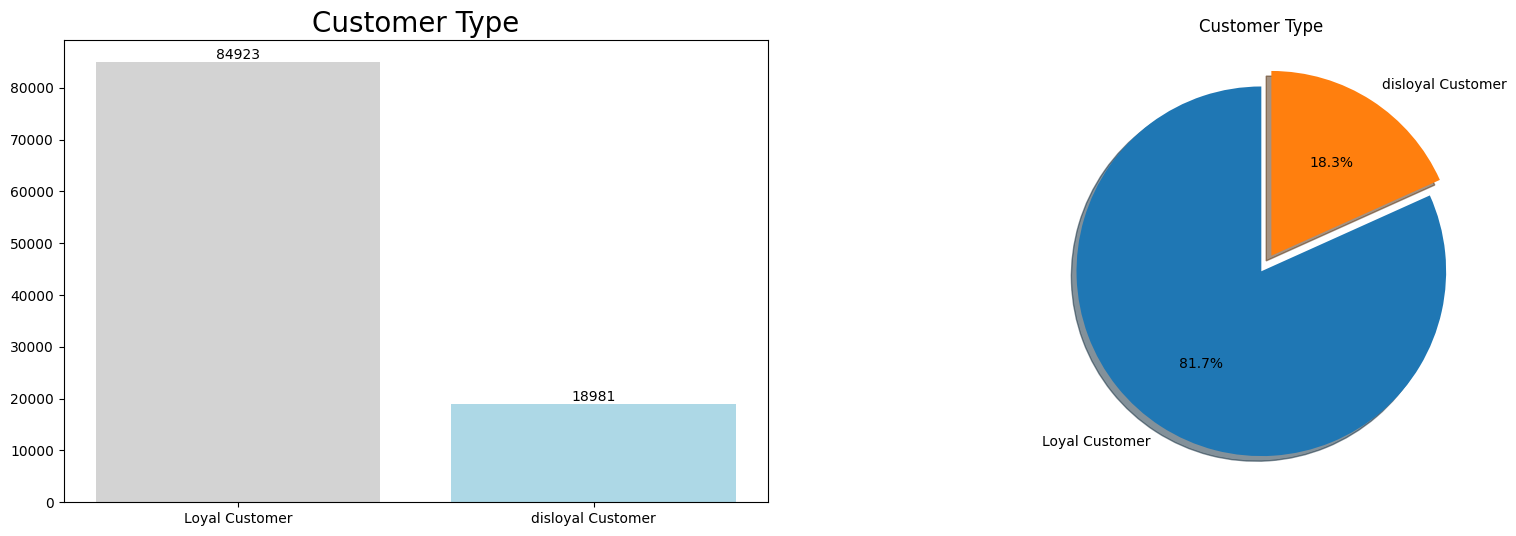

In [64]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,6))

# plot 1

ax1.bar(df["Customer Type"].value_counts().index,df["Customer Type"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("Customer Type",fontsize = 20)
for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

# plot 2

label = list(df['Customer Type'].value_counts().index)
value = list(df["Customer Type"].value_counts().values)
ax2.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90,shadow = True)
ax2.set_title("Customer Type")

Majority of the customers are giving the right feedback and thus loyal.

Text(0.5, 0, 'Age')

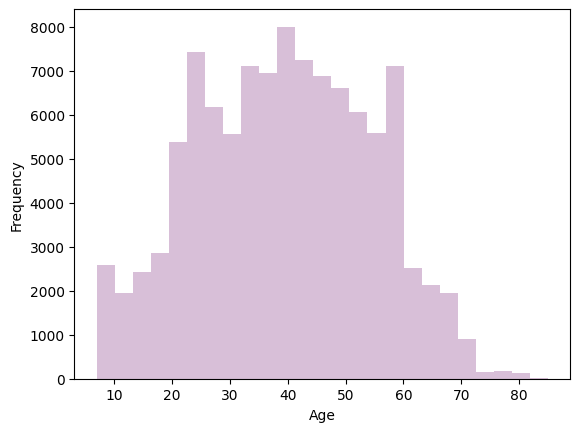

In [65]:
df.Age.plot.hist(bins = 25,color = "thistle")
plt.xlabel("Age")
#plt.ylabel("Gender")

In [ ]:
Higher no. of people are of the age group 40-45

C:\Users\sukum\AppData\Local\Temp\ipykernel_11672\1116467895.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellowgreen'` for the same effect.

  sns.countplot(x = df["Gender"],hue = df["satisfaction"],ax = ax1,color = "yellowgreen")


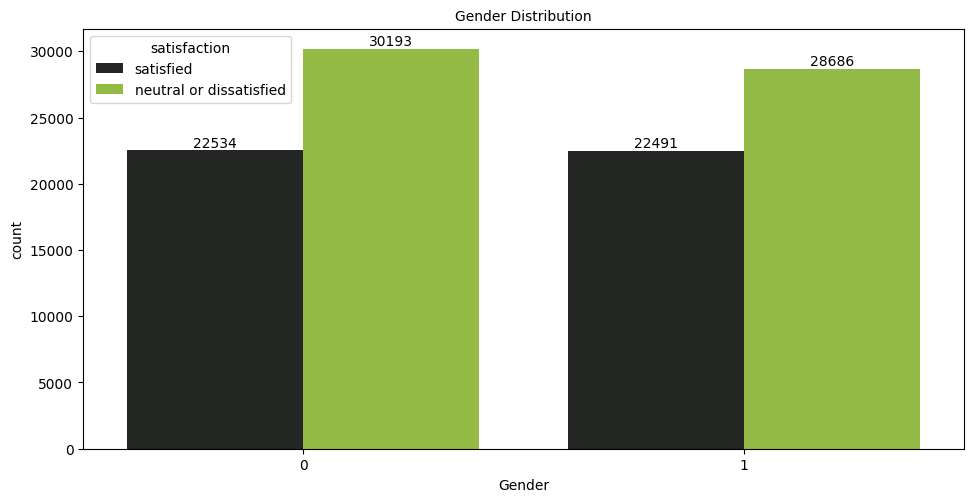

In [66]:
fig = plt.figure(figsize=(25,12))
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)


ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title("Gender Distribution",fontsize = 10)


sns.countplot(x = df["Gender"],hue = df["satisfaction"],ax = ax1,color = "yellowgreen")


for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

C:\Users\sukum\AppData\Local\Temp\ipykernel_11672\1469710200.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:aquamarine'` for the same effect.

  sns.countplot(x = df["Class"],hue = df["satisfaction"],ax = ax2,color = "aquamarine")


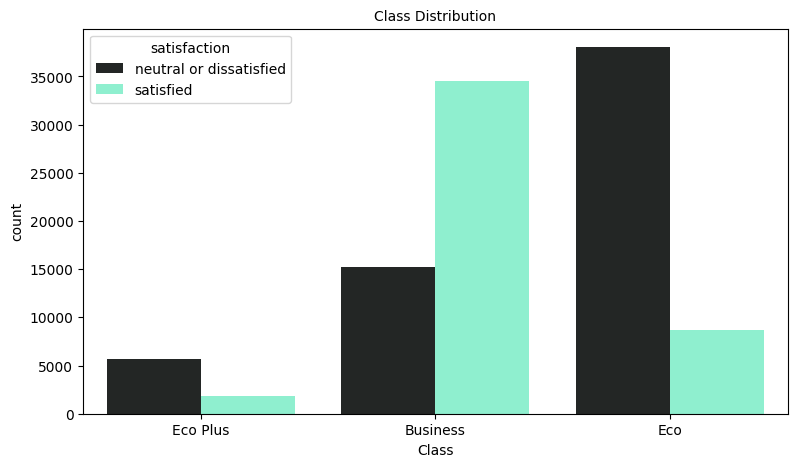

In [67]:
fig = plt.figure(figsize=(20,11))   
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Class Distribution",fontsize = 10)


sns.countplot(x = df["Class"],hue = df["satisfaction"],ax = ax2,color = "aquamarine")


plt.show()

In [ ]:
People travelling in business class are more satisfied comparison to other classes.

Text(0.5, 1.0, 'On-board service')

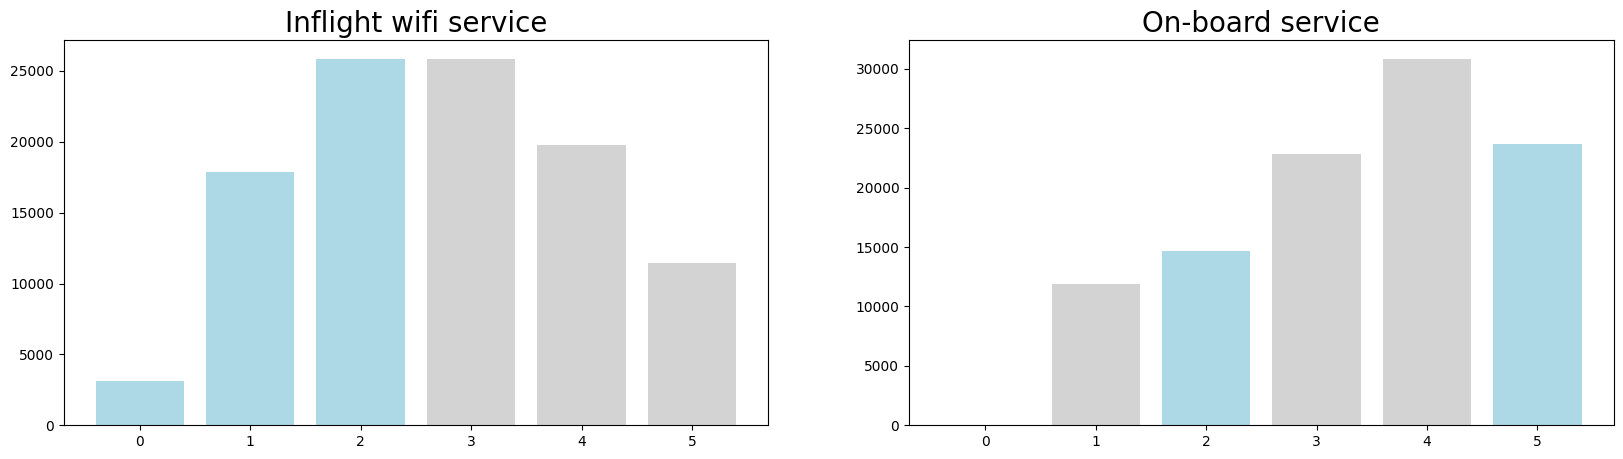

In [69]:
df["Inflight wifi service"].value_counts()
df["On-board service"].value_counts()

fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,5))

# plot 1

ax1.bar(df["Inflight wifi service"].value_counts().index,df["Inflight wifi service"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("Inflight wifi service",fontsize = 20)


# plot 2

ax2.bar(df["On-board service"].value_counts().index,df["On-board service"].value_counts(),color = ["lightgrey","lightblue"])
ax2.set_title("On-board service",fontsize = 20)

CONCLUSION

Most of the passengers were female.
Most of the population was neutral or dissatisfied by the services being provided.
Majority of them were the loyal customers.
Higher no. of people are of the age group 40-45.
Large no. of people were satisfied in the business class.
People travelling in business class are more satisfied comparison to other classes.

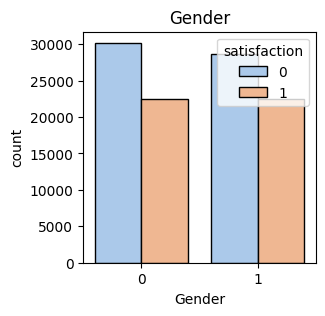

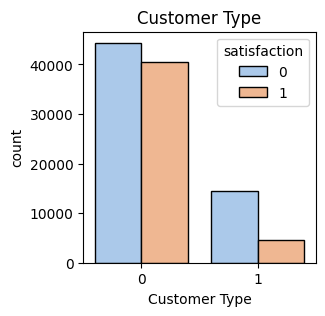

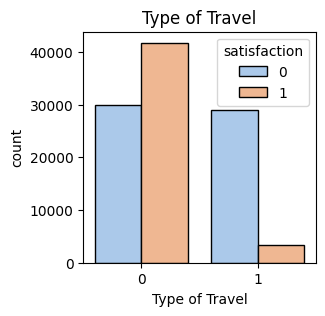

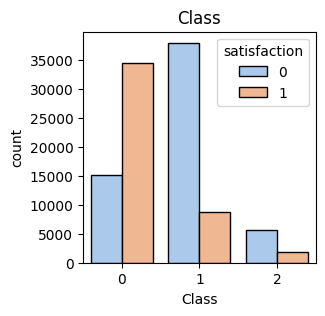

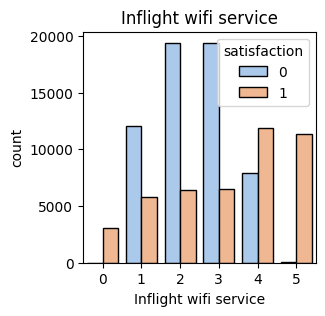

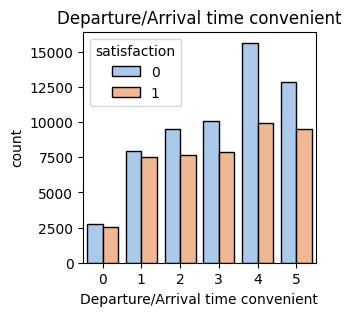

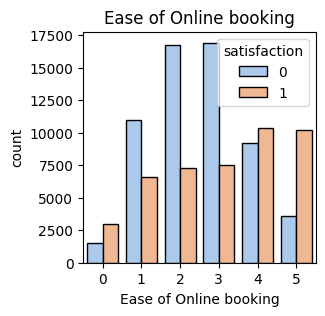

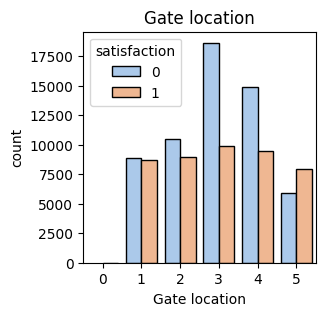

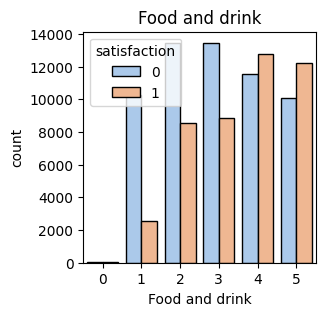

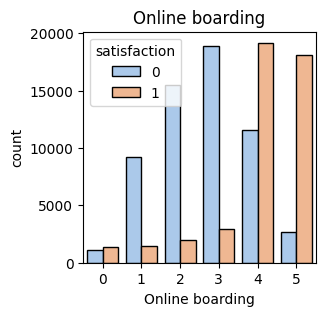

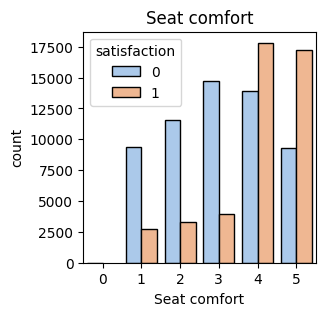

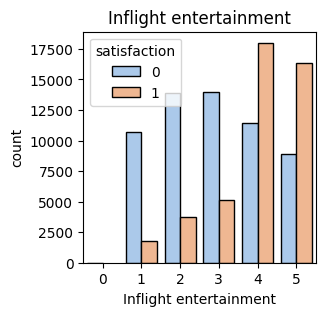

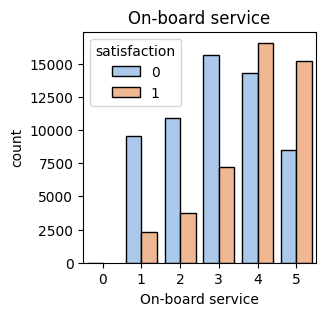

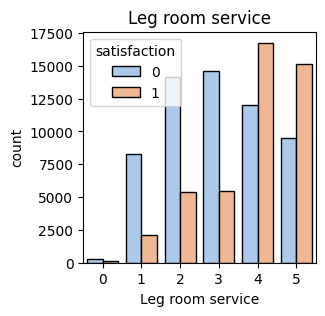

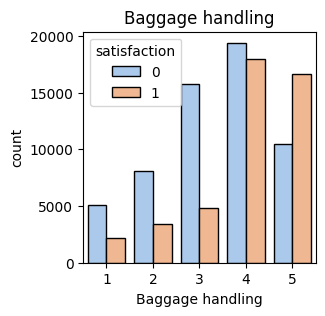

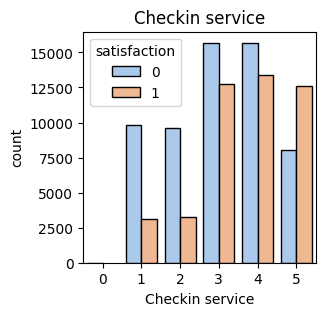

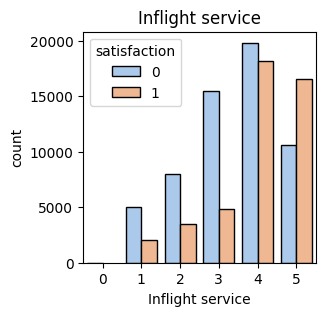

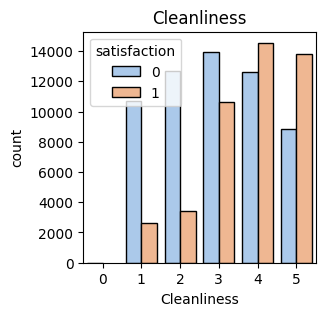

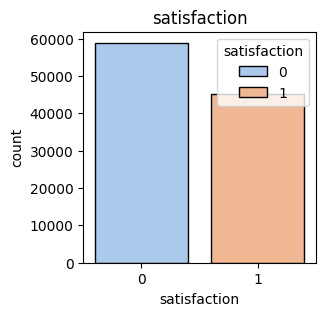

In [43]:
# Perform EDA on the pre procesed data
for i in cat_col:
    plt.figure(figsize=(3,3))
    sns.countplot(x=i, data=df[cat_col], hue="satisfaction",palette="pastel",edgecolor = "black")
    plt.title(i)

#### Cat plot to understand the distribution


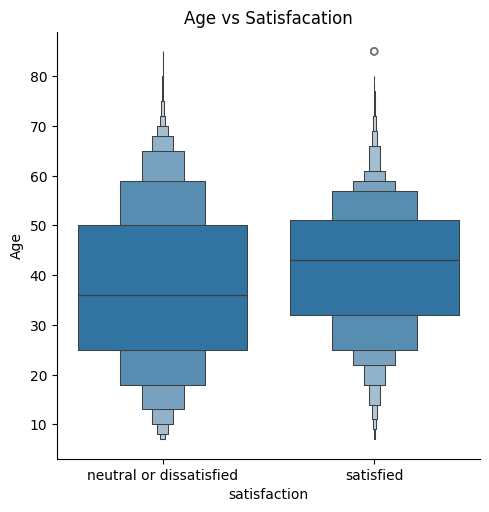

In [70]:
sns.catplot(x="satisfaction", y="Age", kind="boxen",
            data=df.sort_values("satisfaction")).set(title ="Age vs Satisfacation");

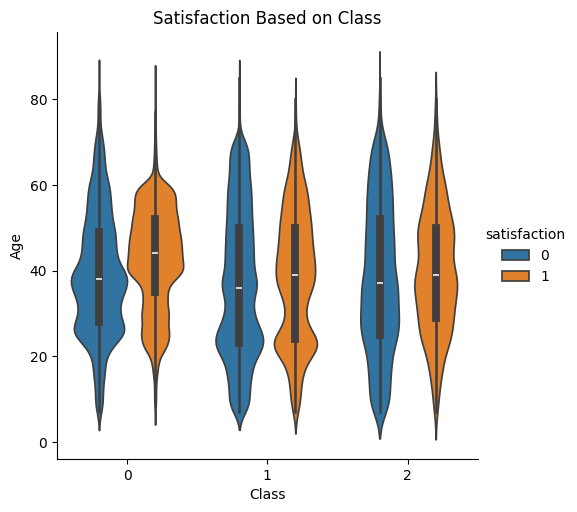

In [36]:
sns.catplot(y="Age", x="Class", hue="satisfaction",
            kind="violin", data=df).set(title ="Satisfaction Based on Class");

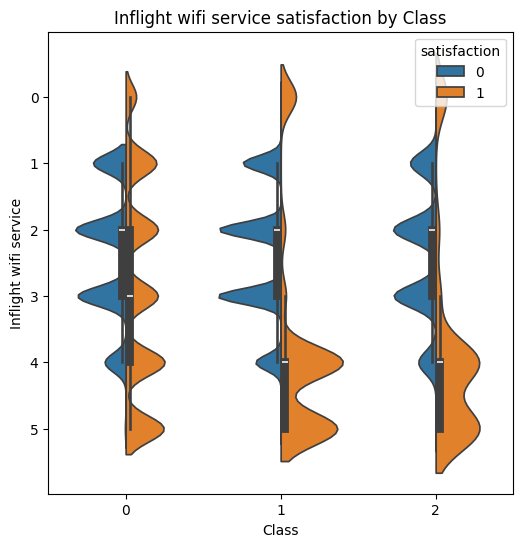

In [37]:

# Violin plot for Inflight wifi service satisfaction by Class
plt.figure(figsize=(6, 6))
sns.violinplot(x='Class', y='Inflight wifi service', hue='satisfaction', data=df, split=True)
plt.title('Inflight wifi service satisfaction by Class')
plt.show()

In [ ]:
# Distribution of Age by Gender and Customer Type
plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Age', hue='Customer Type', data=df)
plt.title('Distribution of Age by Gender and Customer Type')
plt.show()

In [ ]:
# Satisfaction distribution by Gender
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfaction', hue='Gender', data=df)
plt.title('Satisfaction distribution by Gender')
plt.show()

In [ ]:
# Distribution of Flight Distance by Type of Travel and Class
plt.figure(figsize=(6, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df)
plt.title('Distribution of Flight Distance by Type of Travel and Class')
plt.show()

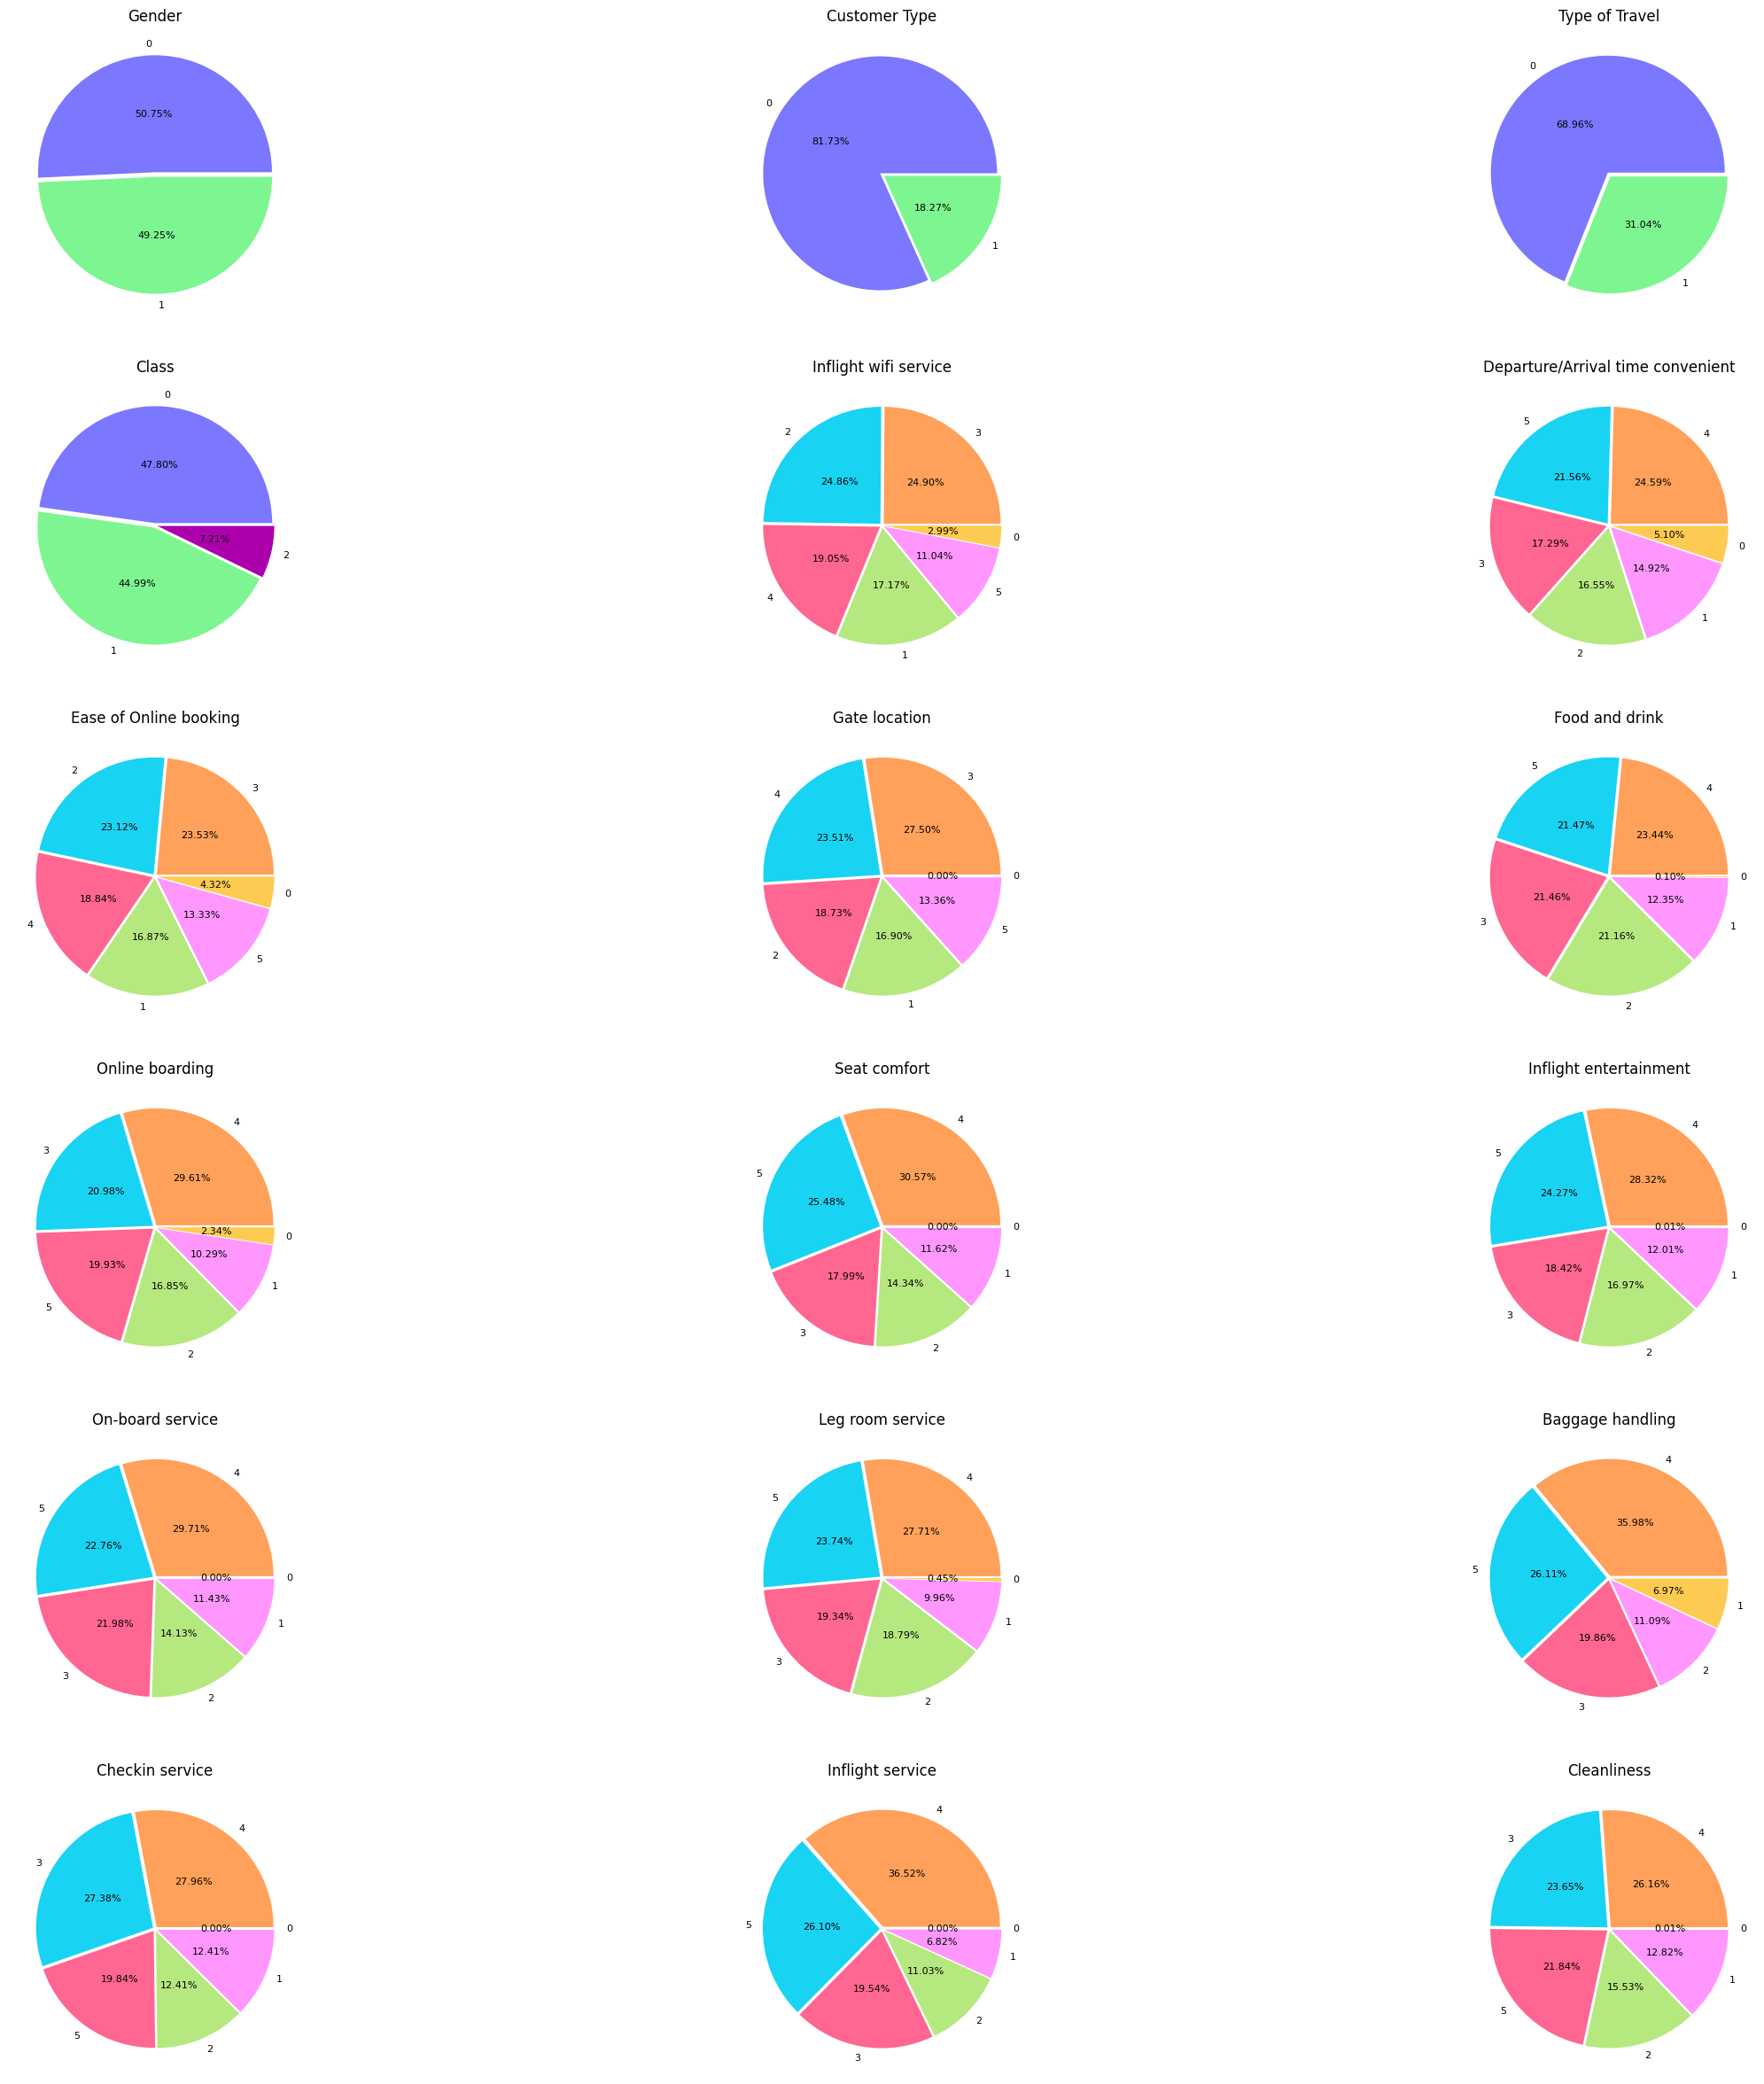

In [14]:
labels=[]
pie, ax = plt.subplots(6,3,figsize=[30,30])

for i,col in enumerate(cat_col):
    #pie, ax = plt.subplots(5,4,figsize=[15,10])
    if col=="satisfaction":
        continue;
    xc=pd.DataFrame(df[col].value_counts())


    labels = df[col].unique()
    if len(labels)==3:
        colors = ['#7b77ff', '#7df691',"#ad00ad"]
        r=[0.02]*3
    if len(labels)==2:
        colors = ['#7b77ff', '#7df691']
        r=[0.02]*2
    if len(labels)==6:
        colors = ['#FFA15A','#19D3F3','#FF6692','#B6E880','#FF97FF','#FECB52']
        r=[0.02]*6
    if len(labels)==5:
        colors = ['#FFA15A','#19D3F3','#FF6692','#FF97FF','#FECB52']
        r=[0.02]*5



    ax[i//3, i%3].pie(x = df[col].value_counts(),autopct='%.2f%%',
    explode=r, labels=xc.index, pctdistance=0.5, textprops={'fontsize': 8}, colors = colors)
    plt.title(f'{i}  distribution',)
    ax[i//3, i%3].set_title(col)

plt.show()

#### Correlation matrix for numerical Data

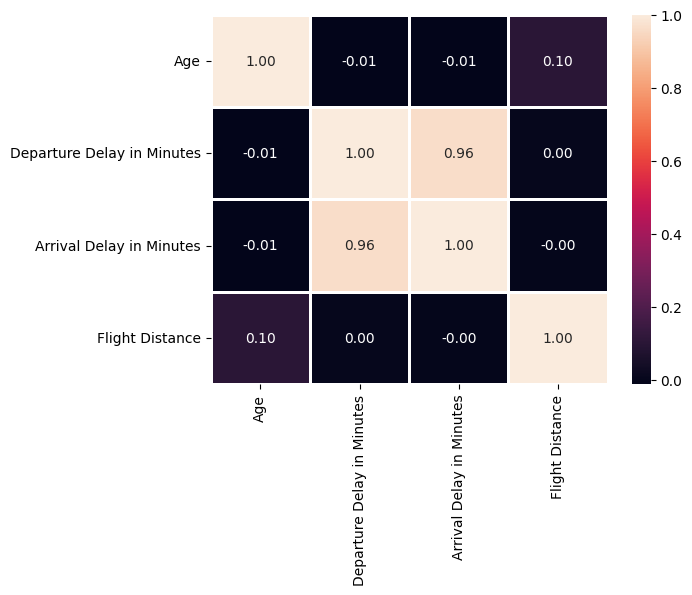

In [15]:
sns.heatmap(df[num_col].corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

#### Correlation matrix for overall data

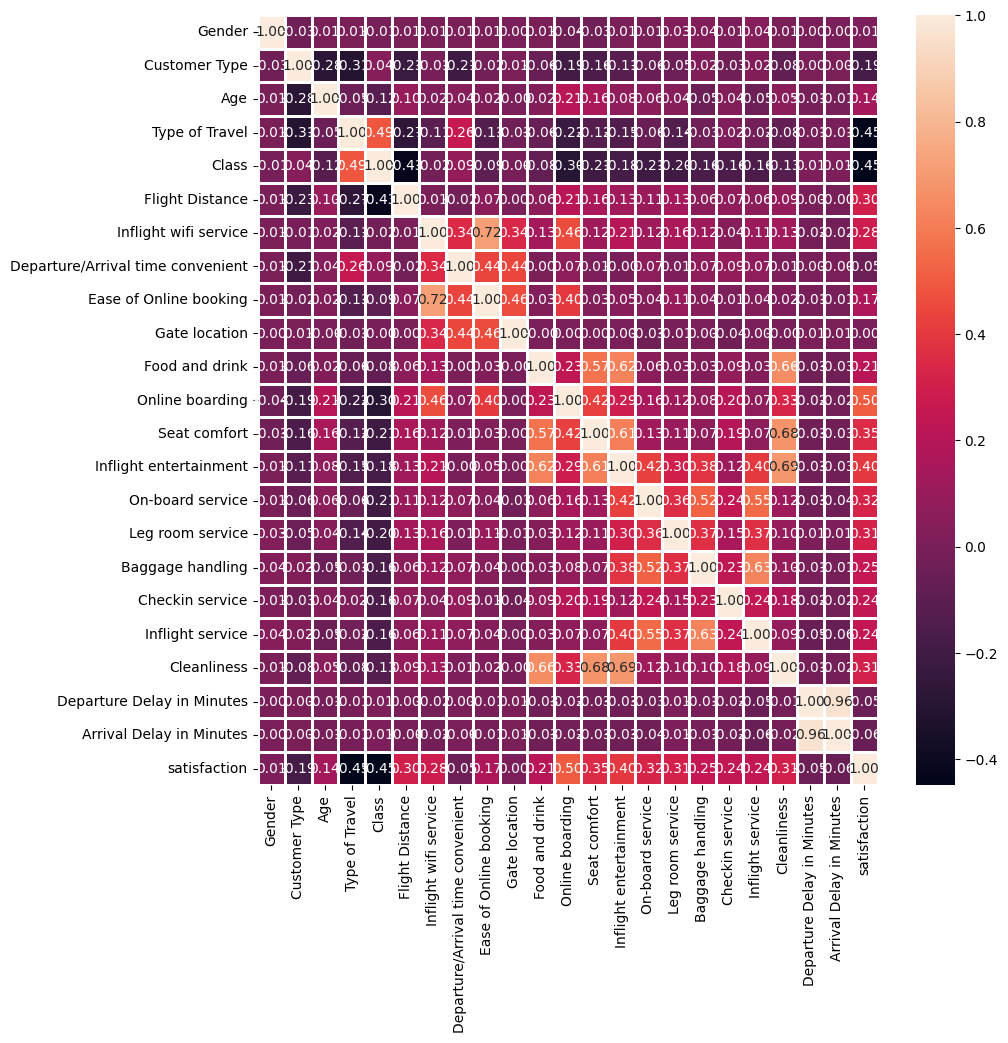

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

#### Visualizing the relationship between numerical features and satisfaction variable using pair plot

<Figure size 1000x1000 with 0 Axes>

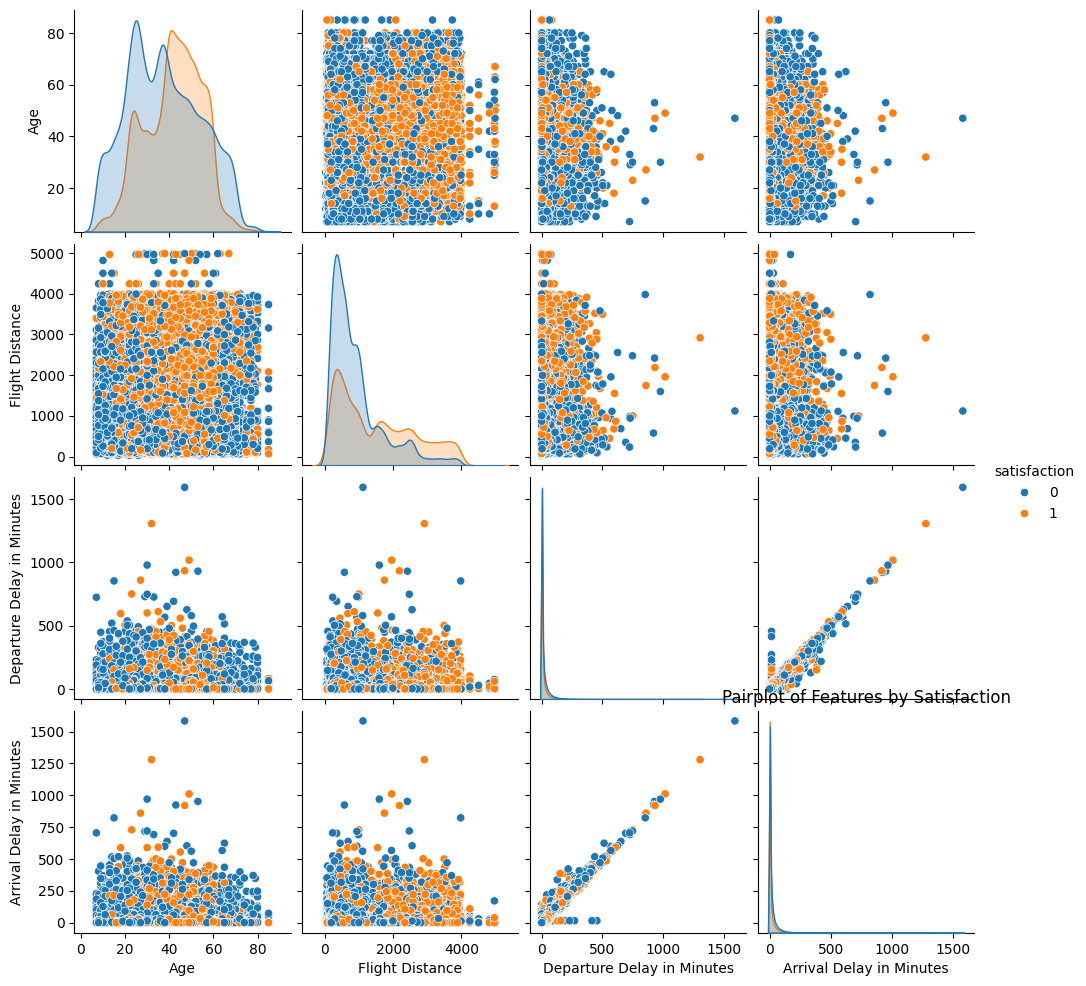

In [17]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='satisfaction')
plt.title('Pairplot of Features by Satisfaction')
plt.show()


#### Visualizing the distribution of numerical features

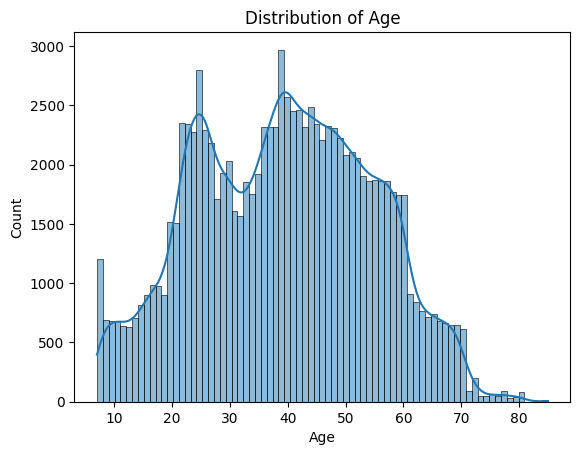

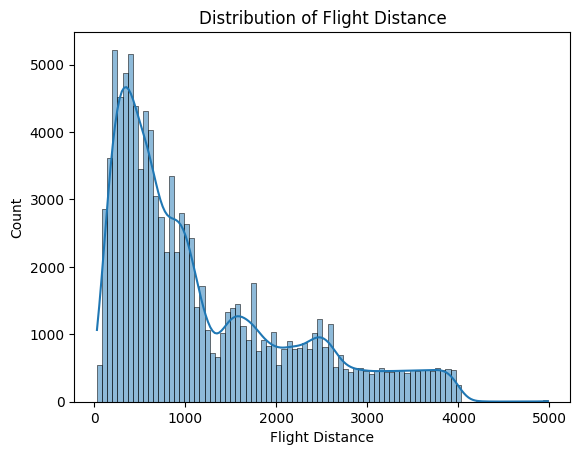

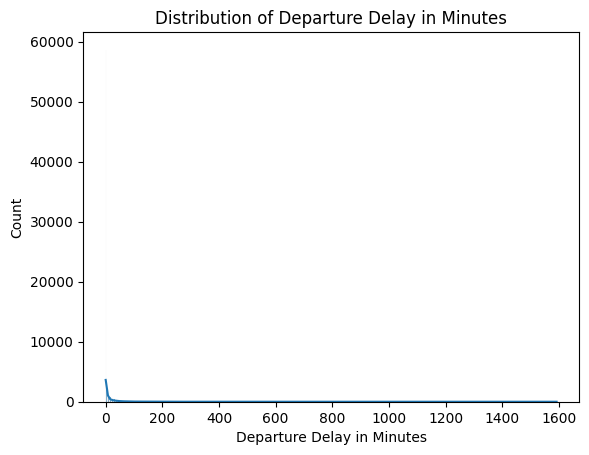

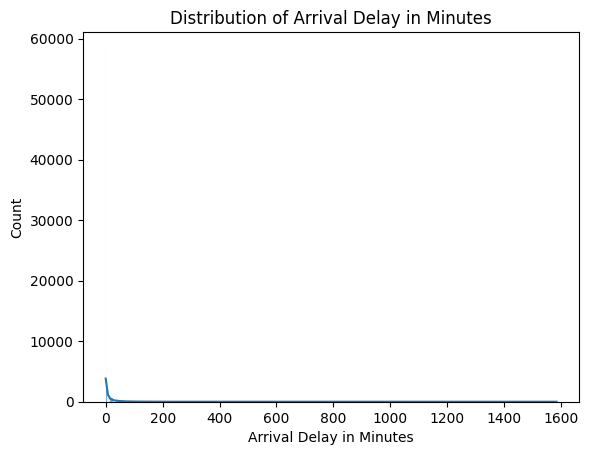

In [18]:
num_features = df.select_dtypes(include=[np.number]).columns
for feature in num_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Distribution of Flight Distance by Type of Travel and Class

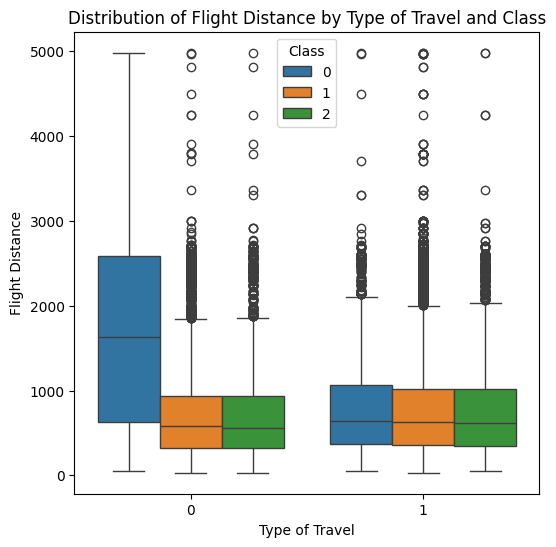

In [20]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df)
plt.title('Distribution of Flight Distance by Type of Travel and Class')
plt.show()

#### Satisfaction distribution by Gender

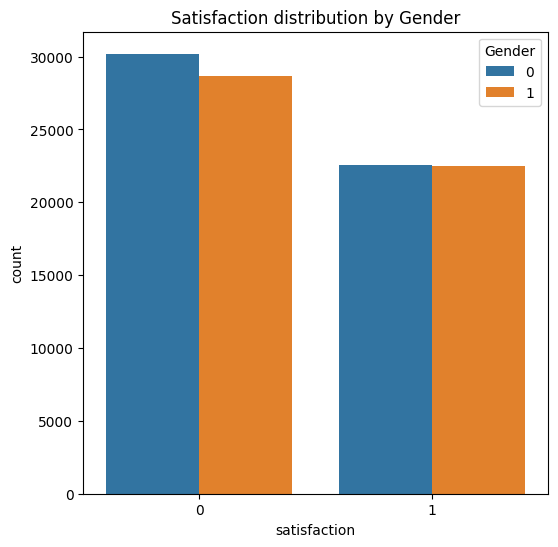

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfaction', hue='Gender', data=df)
plt.title('Satisfaction distribution by Gender')
plt.show()

#### Pairplot of satisfaction with numerical features


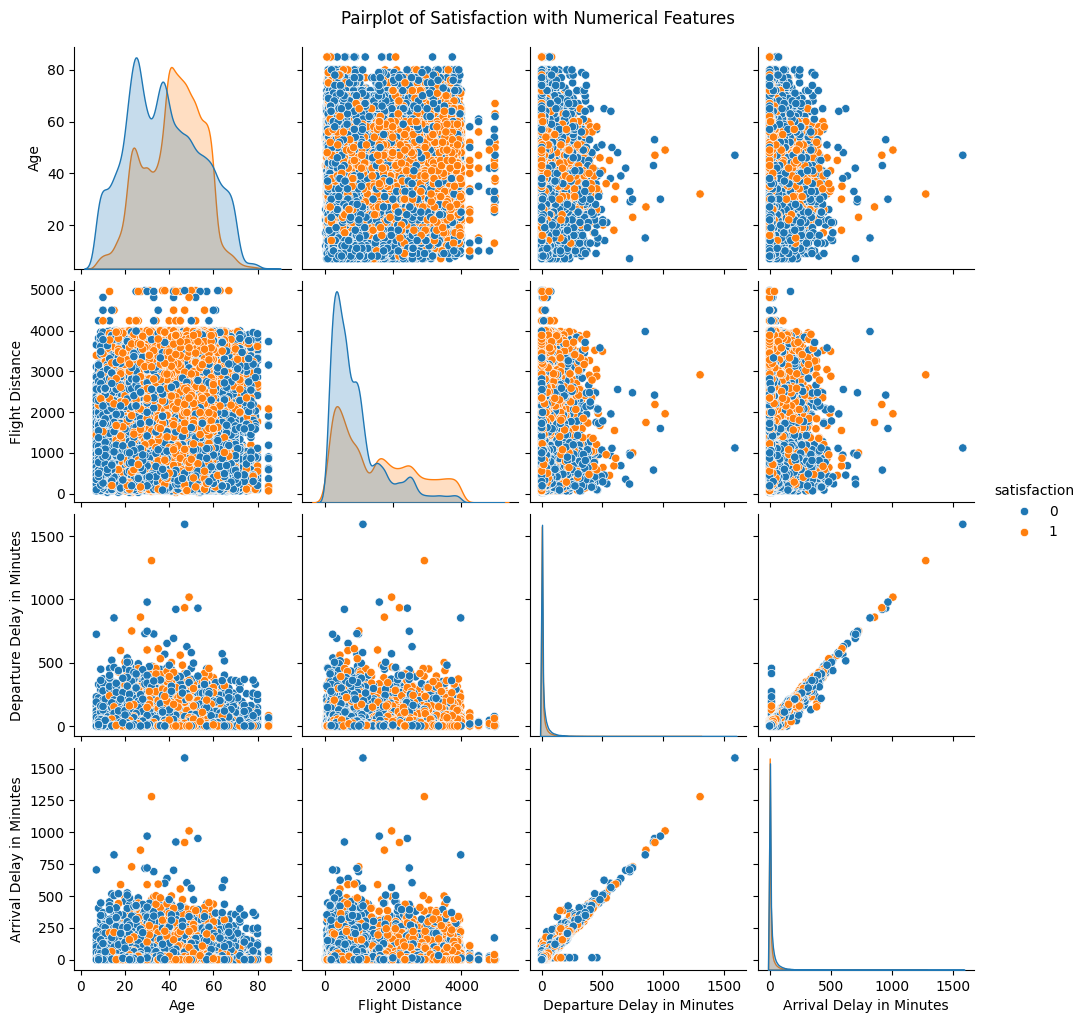

In [22]:
sns.pairplot(df, hue='satisfaction', vars=num_features)
plt.suptitle('Pairplot of Satisfaction with Numerical Features', y=1.02)
plt.show()

#### Violin plot for Inflight wifi service satisfaction by Class

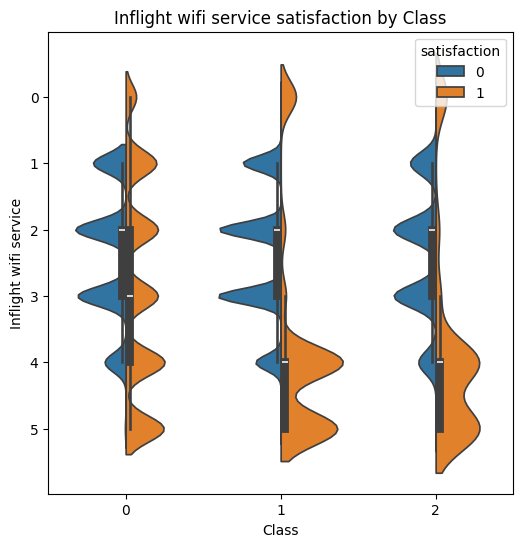

In [23]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='Class', y='Inflight wifi service', hue='satisfaction', data=df, split=True)
plt.title('Inflight wifi service satisfaction by Class')
plt.show()

### Check normality using probability plots for numerical data

C:\Users\sukum\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for Age: p-value = 0.0000


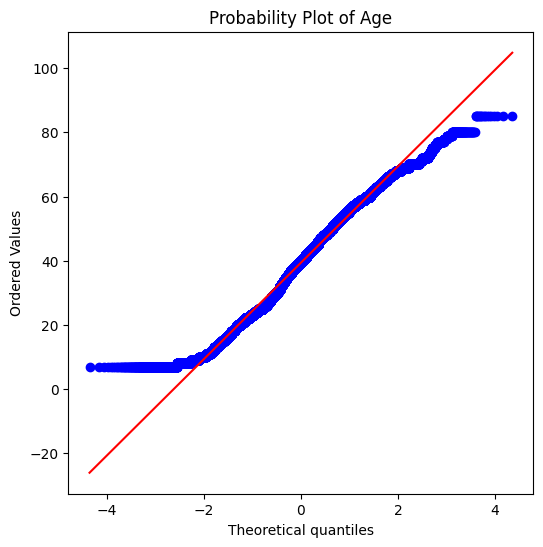

Shapiro-Wilk test for Flight Distance: p-value = 0.0000


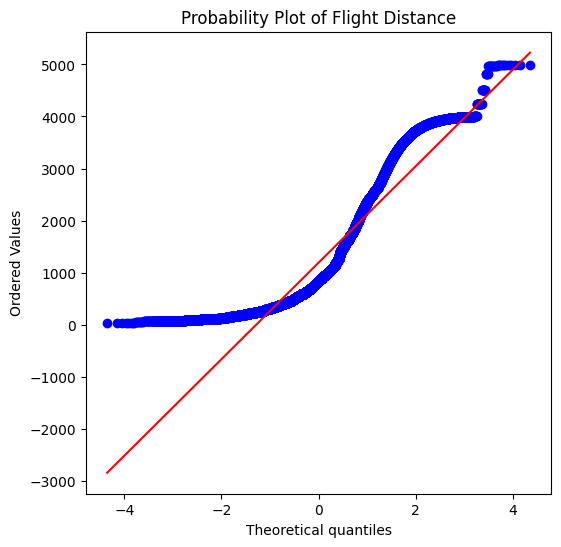

Shapiro-Wilk test for Departure Delay in Minutes: p-value = 0.0000


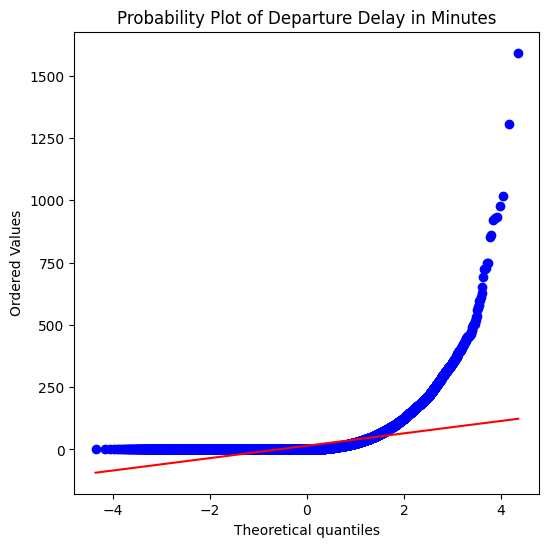

Shapiro-Wilk test for Arrival Delay in Minutes: p-value = 0.0000


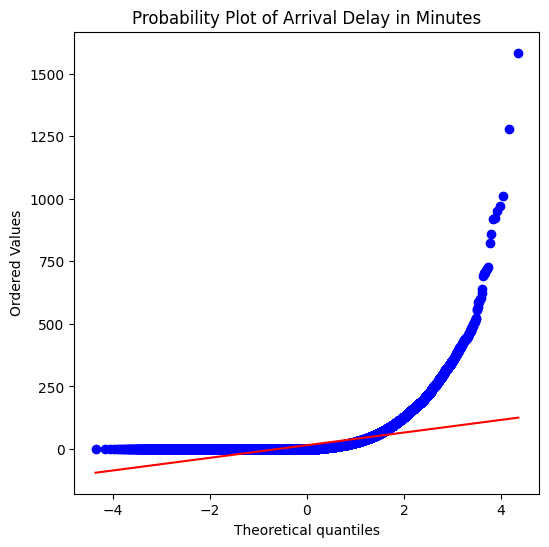

In [24]:
for feature in num_features:
    plt.figure(figsize=(6, 6))
    
    # Probability plot
    probplot(df[feature], plot=plt)
    
    plt.title(f'Probability Plot of {feature}')
    

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[feature])
    print(f'Shapiro-Wilk test for {feature}: p-value = {p_value:.4f}')
    plt.show()

# Modeling


The term "base accuracy" isn't a standard metric in machine learning. However, I assume you might be referring to the accuracy that a simple baseline or naive model would achieve on your dataset. The baseline accuracy is often used as a point of reference to compare with the accuracy of your actual model. A common baseline for binary classification tasks is predicting the majority class for all instances.

In [25]:
# Assuming 'satisfaction' is your target variable
base_accuracy = df['satisfaction'].value_counts(normalize=True).max()

print(f'Base Accuracy: {base_accuracy:.2%}')


Base Accuracy: 56.67%


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Assume 'df' is your DataFrame with a binary target variable 'satisfaction'
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier that predicts the majority class
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = dummy_model.predict(X_test)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')


Baseline Accuracy: 0.56


#### Random Forest Classifier

In [48]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss:.4f}')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Log Loss: 1.3650
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

[[11491   222]
 [  565  8503]]


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df, StandardScaler, train_test_split are defined as in your code

# Split the dataset into features (X) and target variable (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Performance Enhancement

### Using RandomForest

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RandomForest_X_selected = X[selected_features]
RandomForest_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


### Using Correlation

In [29]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Sort features based on correlation with the target variable
target_correlation = corr_matrix['satisfaction'].abs().sort_values(ascending=False)

# Print or visualize the correlation values
print(target_correlation)

# Select top features based on correlation threshold (excluding the target variable)
selected_features = target_correlation[target_correlation.index != 'satisfaction'][target_correlation > 0.01].index.tolist()

# Subset the data with selected features
X_selected = X[selected_features]


satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.449321
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes             0.057497
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                            

### Using Recurssive Elimination

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RFE_X_selected = X[selected_features]
RFE_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


In [31]:
'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding'

('Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Online boarding')

In [32]:
"Online boarding","Class","Type of Travel","Inflight entertainment","Seat comfort","On-board service","Leg room service",
"Cleanliness", "Flight Distance"         

('Cleanliness', 'Flight Distance')

In [33]:
# Split the dataset into features (X) and target variable (y)
X = df[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding',"Inflight entertainment", "Seat comfort", "On-board service","Leg room service",
    "Cleanliness", "Baggage handling", "Inflight service","Checkin service", "Food and drink" ]]
y = df['satisfaction']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

[[11390   323]
 [  672  8396]]


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Assuming X is your feature matrix (excluding the target variable)
X = df.drop('satisfaction', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the loadings of each feature for the first principal component
loadings = pca.components_[0]

# Create a DataFrame with feature names and their loadings
feature_loadings = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort by the absolute value of loadings
feature_loadings['Loading_abs'] = feature_loadings['Loading'].abs()
feature_loadings = feature_loadings.sort_values(by='Loading_abs', ascending=False)


loadings_abs = np.abs(pca.components_)

# Average the absolute values across principal components
average_loadings = loadings_abs.mean(axis=0)

# Create a DataFrame with feature names and their average loadings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Average Loading': average_loadings})

# Sort by the average loading in descending order
feature_ranking = feature_ranking.sort_values(by='Average Loading', ascending=False)

# Display the selected features based on loadings
selected_features = feature_loadings['Feature'].tolist()
print("Selected Features after PCA:")
print(selected_features)

# Display the feature ranking
print("Feature Ranking after PCA:")
print(feature_ranking)

Selected Features after PCA:
['Inflight entertainment', 'Seat comfort', 'Cleanliness', 'Online boarding', 'Food and drink', 'On-board service', 'Inflight service', 'Baggage handling', 'Leg room service', 'Class', 'Inflight wifi service', 'Checkin service', 'Flight Distance', 'Ease of Online booking', 'Type of Travel', 'Customer Type', 'Age', 'Departure/Arrival time convenient', 'Gate location', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gender']
Feature Ranking after PCA:
                              Feature  Average Loading
11                    Online boarding         0.172893
7   Departure/Arrival time convenient         0.158791
4                               Class         0.154411
10                     Food and drink         0.154131
6               Inflight wifi service         0.148899
1                       Customer Type         0.145979
9                       Gate location         0.144353
17                    Checkin service         0.138806
19          

Baseline Accuracy: 0.56
